In [1]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#expmt = "200000_0.1_1_0.5_0.5_uniform_uniform_0.0_30_False_20000_5"
dataset_name = 'ml-20m-tiny'
expmt = "5_False_0.1_0.4_uniform_21000_5250_0_30_1_213973_0.5_0.5_0_0.85"

results_pth = '../results/' + dataset_name + '/Weighted/' + expmt + '/results_df'
init_idxs_pth = '../results/' + dataset_name + '/Weighted/' + expmt + '/init_mats.pkl'
obse_idxs_pth = '../results/' + dataset_name + '/Weighted/' + expmt + '/observed_mats.pkl'
macro_mses_pth = '../results/forecasting/' + dataset_name + '/Weighted/' + expmt + '/macro_mses.npy'

In [2]:
obse_idxs = pickle.load(open(obse_idxs_pth, 'rb'))
init_idxs = pickle.load(open(init_idxs_pth, 'rb'))
#macro_mses = np.load(open(macro_mses_pth))
results = pd.read_csv(results_pth)
n_runs = len(obse_idxs)
print("# of Runs: ", n_runs)

# of Runs:  5


In [4]:
def get_user_cost(n_users, obse_idx):
    user_cost = np.zeros(n_users)
    user_feature_map = []
    for idx in obse_idx:
        user_cost[idx[0]] += 1
    return user_cost

def get_high_freq_users(X, n_users, n_feats, obse_idx):
    n_features = X.shape[1]
    user_cost = get_user_cost(n_users, obse_idx)
    return np.where(user_cost >= n_feats/2)[0]

In [17]:
user_mses.shape

(5, 11, 5000)

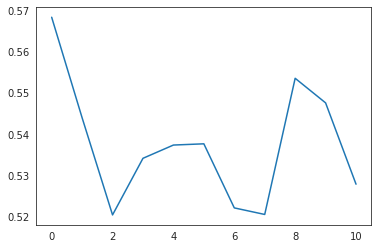

In [18]:
first_run = user_mses[0]
first_run = first_run.T
for i in range(1):
    plt.plot(first_run[40])
    

(array([  1.,   2.,   7.,   9.,  13.,  26.,  40.,  86., 216., 451., 340.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
 array([-0.5       , -0.45238095, -0.4047619 , -0.35714286, -0.30952381,
        -0.26190476, -0.21428571, -0.16666667, -0.11904762, -0.07142857,
        -0.02380952,  0.02380952,  0.07142857,  0.11904762,  0.16666667,
         0.21428571,  0.26190476,  0.30952381,  0.35714286,  0.4047619 ,
         0.45238095,  0.5       ]),
 <a list of 21 Patch objects>)

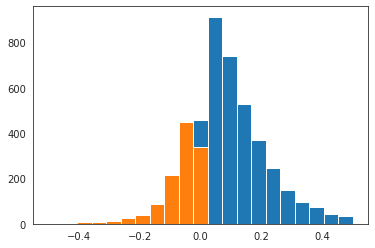

In [19]:
# How many users experience improved performance after all data is collected
improved_idxs = np.where( first_run[:,9] < first_run[:,0])[0]
worst_idxs = np.where( first_run[:,9] > first_run[:,0])[0]

user_deltas = -1*(first_run[:,9] - first_run[:,0])
plt.hist(user_deltas[improved_idxs], range=(-.5, .5), bins=21)
plt.hist(user_deltas[worst_idxs], range=(-.5, .5), bins=21)

In [20]:
len(improved_idxs), len(worst_idxs)

(3804, 1196)

Text(0.5, 69.0, '# of Features Collected')

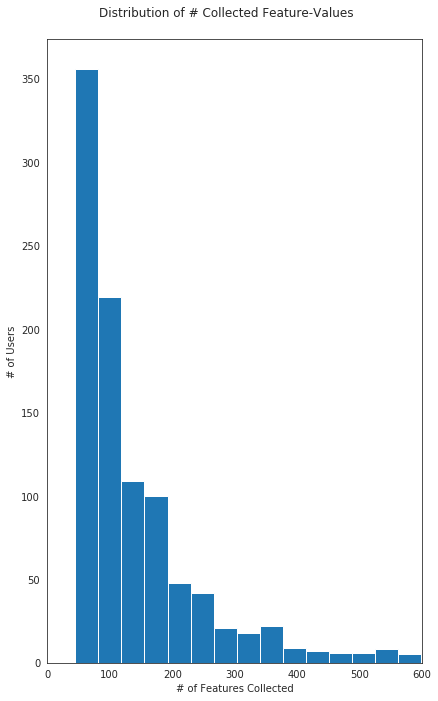

In [12]:
import sys
sys.path.append("../")
sns.set_style("white")
from utils.dataset_helpers import set_to_array
user_costs = get_user_cost(1000, set_to_array(np.expand_dims(obse_idxs[0][5],0)[0]))
plt.figure(figsize=(6, 10
                   ))
plt.hist(user_costs, bins=40)
plt.xlim(0, 600)
plt.suptitle("Distribution of # Collected Feature-Values")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.ylabel("# of Users")
plt.xlabel("# of Features Collected")

In [ ]:
len(obse_idxs[0])

In [ ]:
from scipy.stats import pearsonr
run_no = 1
interval_no = 4
n_runs = 5
n_intervals = 10
for run_no in range(n_runs):
    for interval_no in [5]:
        run_observed_idxs = set_to_array(np.expand_dims(obse_idxs[run_no][interval_no],0))[0]
        run_init_idxs = set_to_array(np.expand_dims(init_idxs[run_no],0)[0])
        run_user_costs = get_user_cost(5000, run_observed_idxs)
        run_user_init_costs = get_user_cost(5000, run_init_idxs)
        run_user_collected_costs = run_user_costs - run_user_init_costs
        run_user_mses = user_mses[run_no][interval_no]
        print(pearsonr(run_user_init_costs, run_user_mses), pearsonr(run_user_costs, run_user_mses))

In [ ]:
plt.scatter(run_user_collected_costs[np.argsort(run_user_collected_costs)], 
            run_user_mses[np.argsort(run_user_collected_costs)])

In [ ]:
plt.scatter(run_user_init_costs[np.argsort(run_user_init_costs)], 
            run_user_collected_costs[np.argsort(run_user_init_costs)])